## Assignment -2

### problem: 
Problem Description: On April 15, 1912, during her maiden voyage, the Titanic sank after collidingwith an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.One of the reasons that the shipwreck led to such loss of life was that there were notenough lifeboats for the passengers and crew.Although there was some element of luck involved in surviving the sinking, some groups ofpeople were more likely to survive than others, such as women, children, and the upper-class.The problem associated with the Titanic dataset is to predict whether a passenger survived the disaster or not. The dataset contains various features such as passenger class, age, gender,cabin, fare, and whether the passenger had any siblings or spouses on board. These features canbe used to build a predictive model to determine the likelihood of a passenger surviving the disaster. The dataset offers opportunities for feature engineering, data visualization, and modelselection, making it a valuable resource for developing and testing data analysis and machine learning skills.

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('titanic.csv')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### a) Univariate analysis

-- HISTOGRAM

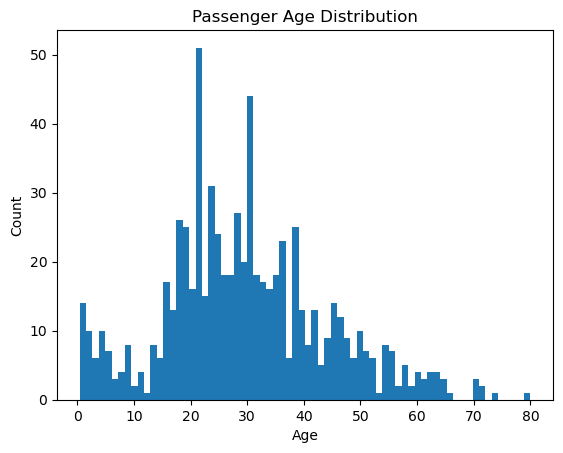

In [15]:
plt.hist(df['age'].dropna(), bins=70)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Passengers Ages')
plt.show()

-- BARPLOT

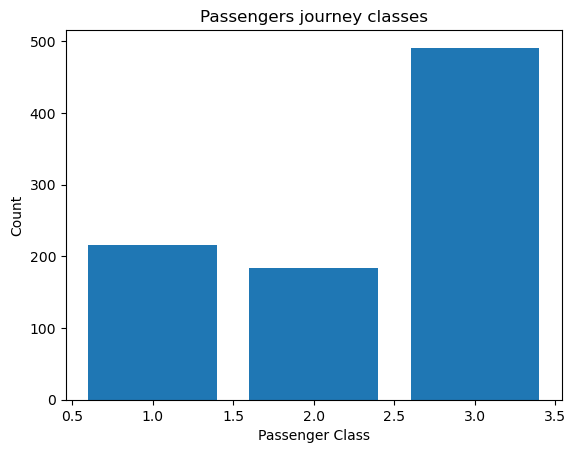

In [17]:
class_counts = df['pclass'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passengers journey classes')
plt.show()

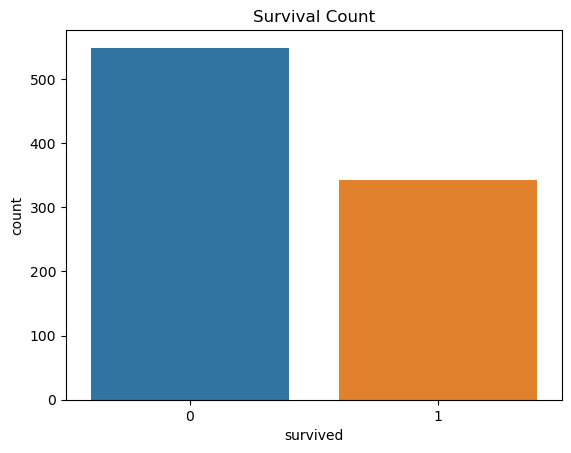

In [23]:
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.show()

### b) Bivariate analysis

-- SCATTER PLOT, COUNT PLOT AND BOX PLOT

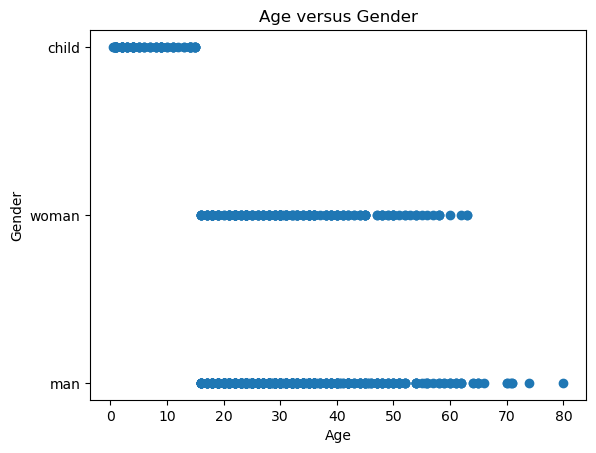

In [19]:
plt.scatter(df['age'], df['who'])
plt.xlabel('Age')
plt.ylabel('Gender')
plt.title('Age versus Gender')
plt.show()

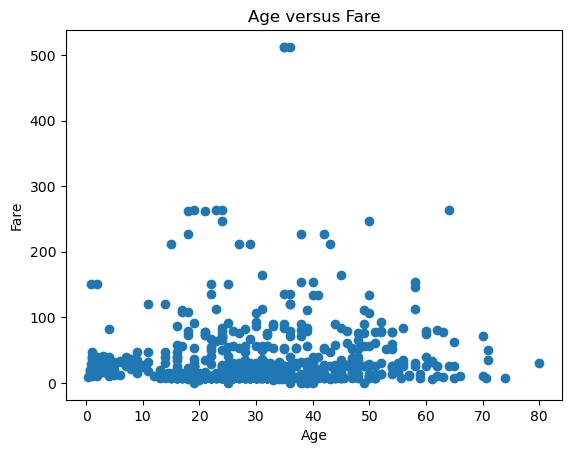

In [20]:
plt.scatter(df['age'], df['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age versus Fare')
plt.show()

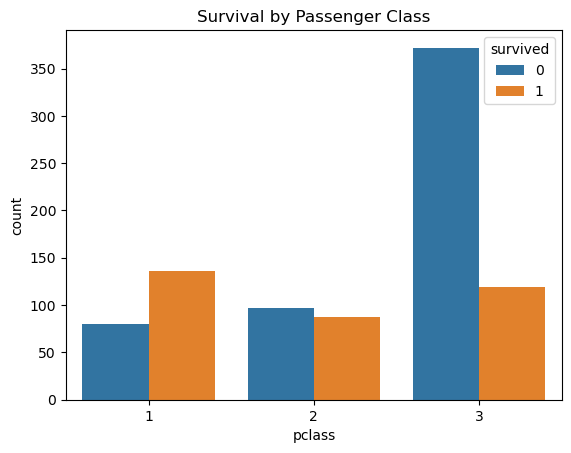

In [25]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival of Passengers wrt their Class')
plt.show()

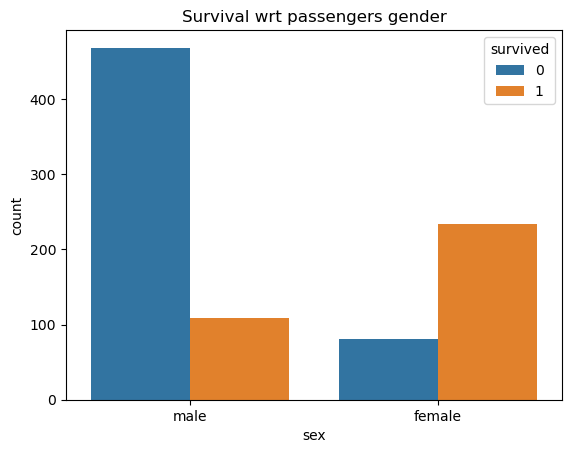

In [28]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival wrt passengers gender')
plt.show()

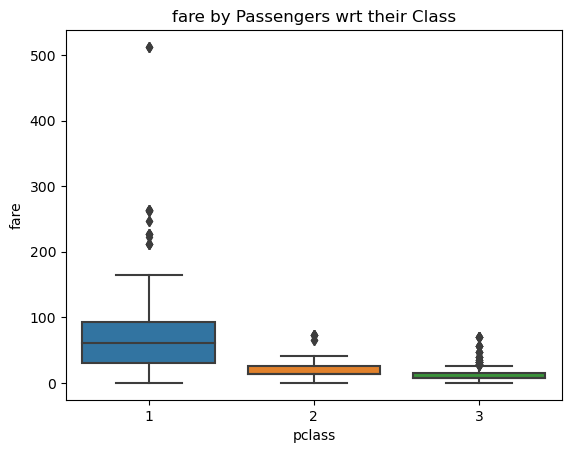

In [30]:
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('fare by Passengers wrt their Class')
plt.show()

### c) Multivarite analysis

-- CORRELATION AND HEATMAP and PAIR PLOT

In [32]:
correlation = df.corr(numeric_only=True)

In [33]:
correlation

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


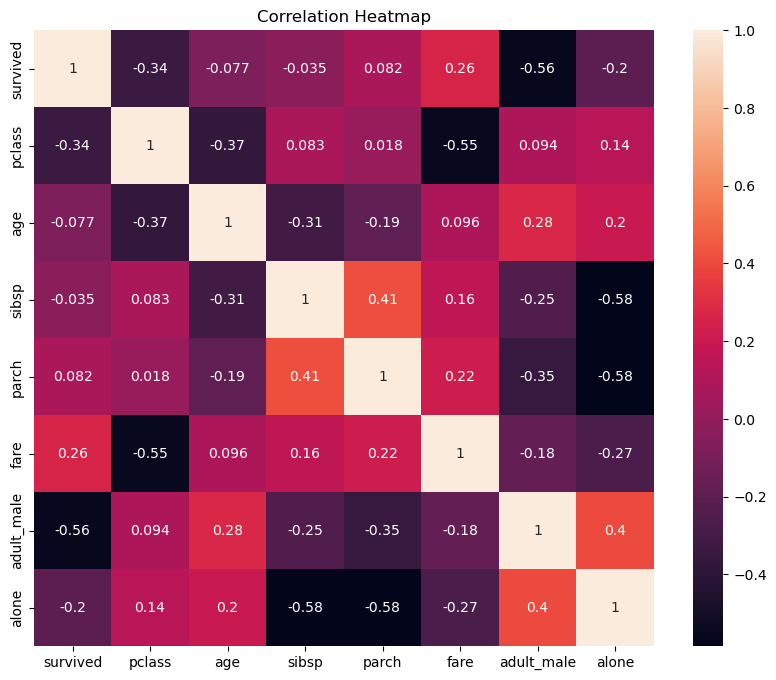

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap')
plt.show()

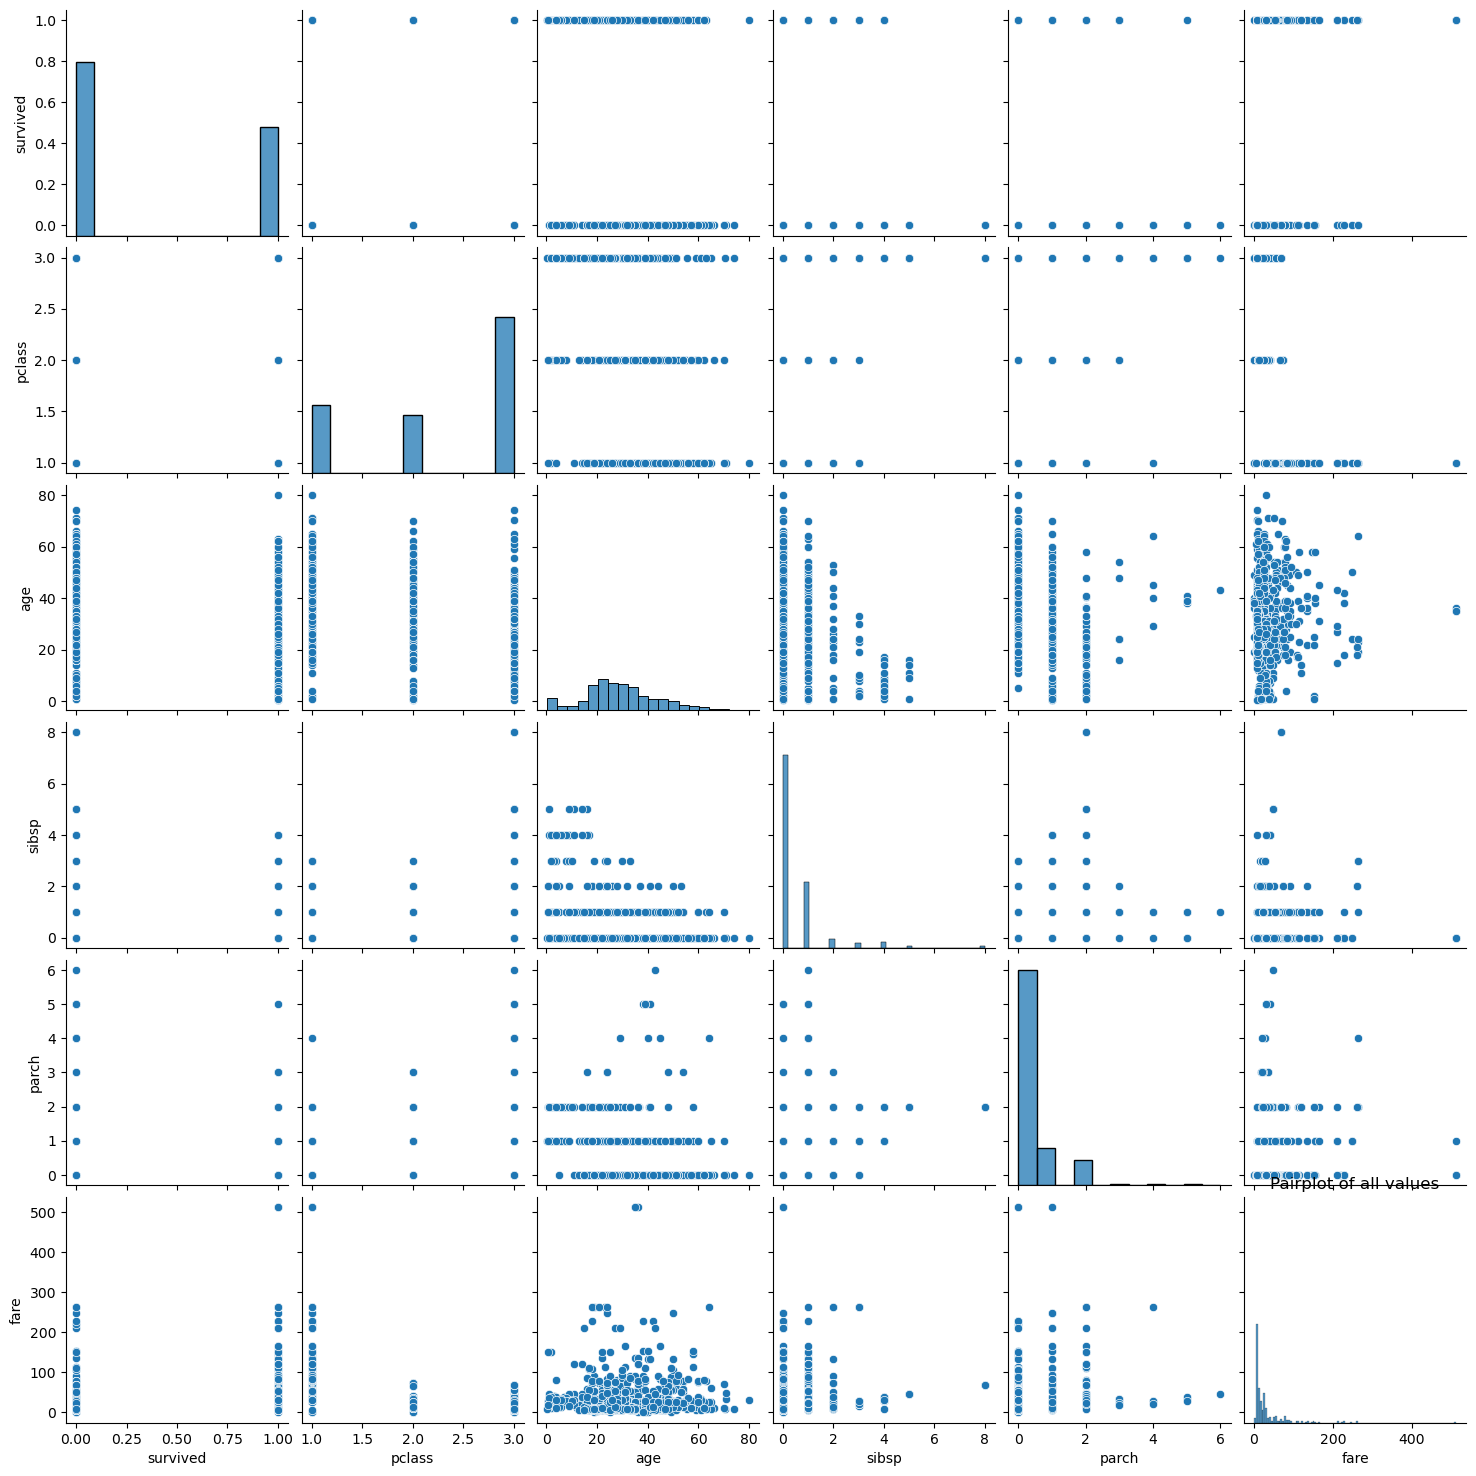

In [40]:
sns.pairplot(df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']])
plt.title('Pairplot of all values')
plt.show()

### Statistics

In [41]:
df.describe

<bound method NDFrame.describe of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult

In [42]:
meanage = df['age'].mean()
print("Mean Age:", meanage)

Mean Age: 29.69911764705882


In [43]:
medianage = df['age'].median()
print("Median Age:", medianage)

Median Age: 28.0


In [44]:
meanfare = df['fare'].mean()
print("Mean Fare:", meanage)

Mean Fare: 29.69911764705882


In [45]:
medianfare = df['fare'].median()
print("Median Fare:", medianfare)

Median Fare: 14.4542


In [61]:
modeembarked = df['embarked'].mode()[0]
print("Mode of Embarked:", modeembarked)

Mode of Embarked: S


In [50]:
mode_Survived = df['survived'].mode()
print("Mode of Survived:", mode_Survived)

Mode of Survived: 0    0
Name: survived, dtype: int64


In [55]:
pclasscount = df['pclass'].value_counts()
print("Passenger Class Count:")
print(pclasscount)

Passenger Class Count:
3    491
1    216
2    184
Name: pclass, dtype: int64


In [56]:
average_age_by_survival = df.groupby('survived')['age'].mean()
print("Average Age by Survival:")
print(average_age_by_survival)

Average Age by Survival:
survived
0    30.626179
1    28.343690
Name: age, dtype: float64


### Handling the Missing values.

In [57]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [59]:
df['age'].fillna(medianage, inplace=True)

In [62]:
df['embarked'].fillna(modeembarked, inplace=True)

In [65]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [67]:
print(df[['deck', 'embark_town']])

    deck  embark_town
0    NaN  Southampton
1      C    Cherbourg
2    NaN  Southampton
3      C  Southampton
4    NaN  Southampton
..   ...          ...
886  NaN  Southampton
887    B  Southampton
888  NaN  Southampton
889    C    Cherbourg
890  NaN   Queenstown

[891 rows x 2 columns]


In [70]:
df['deck'] = df['deck'].fillna('Unknown')
df.dropna(subset=['embark_town'], inplace=True)

In [71]:
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


### Finding and replacing the outliers

In [78]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
IQR

23.1042

In [79]:
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR
lb,ub

(-26.7605, 65.6563)

In [80]:
outliers = df[(df['fare'] < lb) | (df['fare'] > ub)]

In [81]:
outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,28.0,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,Unknown,Cherbourg,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,28.0,8,2,69.5500,S,Third,man,True,Unknown,Southampton,no,False
849,1,1,female,28.0,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,Unknown,Southampton,yes,False
863,0,3,female,28.0,8,2,69.5500,S,Third,woman,False,Unknown,Southampton,no,False


In [82]:
df.loc[outliers.index, 'Fare'] = ub

In [83]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Fare
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False,NaN
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,65.6563
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True,NaN
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,NaN
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Unknown,Southampton,no,True,NaN
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,NaN
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Unknown,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,NaN


### Check for Categorical columns and perform encoding.

In [84]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')


In [86]:
df_encoded = pd.get_dummies(df, columns=['sex', 'embarked'])

In [87]:
df_encoded

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,Fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,man,True,Unknown,Southampton,no,False,NaN,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,65.6563,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,Third,woman,False,Unknown,Southampton,yes,True,NaN,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,NaN,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,Third,man,True,Unknown,Southampton,no,True,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,Second,man,True,Unknown,Southampton,no,True,NaN,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,First,woman,False,B,Southampton,yes,True,NaN,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,Third,woman,False,Unknown,Southampton,no,False,NaN,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True,NaN,0,1,1,0,0


In [88]:
df=df_encoded

In [89]:
df

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,Fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,man,True,Unknown,Southampton,no,False,NaN,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,65.6563,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,Third,woman,False,Unknown,Southampton,yes,True,NaN,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,NaN,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,Third,man,True,Unknown,Southampton,no,True,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,Second,man,True,Unknown,Southampton,no,True,NaN,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,First,woman,False,B,Southampton,yes,True,NaN,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,Third,woman,False,Unknown,Southampton,no,False,NaN,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True,NaN,0,1,1,0,0


In [90]:
X = df.drop('survived', axis=1)
y = df['survived']

In [91]:
X,y

(     pclass   age  sibsp  parch     fare   class    who  adult_male     deck  \
 0         3  22.0      1      0   7.2500   Third    man        True  Unknown   
 1         1  38.0      1      0  71.2833   First  woman       False        C   
 2         3  26.0      0      0   7.9250   Third  woman       False  Unknown   
 3         1  35.0      1      0  53.1000   First  woman       False        C   
 4         3  35.0      0      0   8.0500   Third    man        True  Unknown   
 ..      ...   ...    ...    ...      ...     ...    ...         ...      ...   
 886       2  27.0      0      0  13.0000  Second    man        True  Unknown   
 887       1  19.0      0      0  30.0000   First  woman       False        B   
 888       3  28.0      1      2  23.4500   Third  woman       False  Unknown   
 889       1  26.0      0      0  30.0000   First    man        True        C   
 890       3  32.0      0      0   7.7500   Third    man        True  Unknown   
 
      embark_town alive  a

#### Split the data into training and testing

In [93]:
from sklearn.model_selection import train_test_split

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [99]:
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [100]:
df

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,Fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,-0.786961,0.825209,-0.563674,0.431350,-0.474326,-0.500240,Third,man,True,Unknown,Southampton,no,False,NaN,0,1,0,0,1
1,1.270711,-1.572211,0.669217,0.431350,-0.474326,0.788947,First,woman,False,C,Cherbourg,yes,False,0.0,1,0,1,0,0
2,1.270711,0.825209,-0.255451,-0.475199,-0.474326,-0.486650,Third,woman,False,Unknown,Southampton,yes,True,NaN,1,0,0,0,1
3,1.270711,-1.572211,0.438050,0.431350,-0.474326,0.422861,First,woman,False,C,Southampton,yes,False,NaN,1,0,0,0,1
4,-0.786961,0.825209,0.438050,-0.475199,-0.474326,-0.484133,Third,man,True,Unknown,Southampton,no,True,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.786961,-0.373501,-0.178396,-0.475199,-0.474326,-0.384475,Second,man,True,Unknown,Southampton,no,True,NaN,0,1,0,0,1
887,1.270711,-1.572211,-0.794841,-0.475199,-0.474326,-0.042213,First,woman,False,B,Southampton,yes,True,NaN,1,0,0,0,1
888,-0.786961,0.825209,-0.101340,0.431350,2.006119,-0.174084,Third,woman,False,Unknown,Southampton,no,False,NaN,1,0,0,0,1
889,1.270711,-1.572211,-0.255451,-0.475199,-0.474326,-0.042213,First,man,True,C,Cherbourg,yes,True,NaN,0,1,1,0,0


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
X_train, X_test, y_train, y_test

(     pclass   age  sibsp  parch      fare  class    who  adult_male     deck  \
 708       1  22.0      0      0  151.5500  First  woman       False  Unknown   
 240       3  28.0      1      0   14.4542  Third  woman       False  Unknown   
 382       3  32.0      0      0    7.9250  Third    man        True  Unknown   
 792       3  28.0      8      2   69.5500  Third  woman       False  Unknown   
 683       3  14.0      5      2   46.9000  Third  child       False  Unknown   
 ..      ...   ...    ...    ...       ...    ...    ...         ...      ...   
 107       3  28.0      0      0    7.7750  Third    man        True  Unknown   
 271       3  25.0      0      0    0.0000  Third    man        True  Unknown   
 862       1  48.0      0      0   25.9292  First  woman       False        D   
 436       3  21.0      2      2   34.3750  Third  woman       False  Unknown   
 103       3  33.0      0      0    8.6542  Third    man        True  Unknown   
 
      embark_town alive  a